# Analyze some real ECGs Using a Python Package: HeartPy
## Remember, the point of this notebook is not to become an expert in ECG analysis. The point is to learn to use prebuilt code (packages, in this case HeartPy) to simplify an otherwise very complex problem. The documentation for HeartPy can be found here: https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/
## While it is alwasy nice when stuff works automatically, **it is much more important to have an idea or intuition as to why it works**. As you go through this notebook, reference the documentation to get a more detailed understanding of the methods and arguments we are using from HeartPy. **In order to fully leverage pre-written code in Python (packages), this is an *essential*Package skill!**

### As always, lets install some dependecies

In [2]:
%pip install heartpy
import heartpy as hp
import numpy as np
import pprint # pretty print (we can use this to nicely visualize dictionaries)
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


### As we will be analyzing multiple ECGs, we dont't want to have to go through the process of rewriting the same extraction/ processing code each time. This function will give us a way to reuse the same block of code multiple times so we can rapidly process all of our data cleanly. The code is annotated, but it will make more sense as you progress through the notebook, so keep going!

In [6]:
# Define a function to get the data out of the raw ecg csv file
def extract_data(data, frequency, enhance):
    if enhance is True: # give us the option to apply a built in peak enhancement method from heartpy
        data = hp.enhance_ecg_peaks(data, frequency, iterations = 3) # replace the data variable argument with enhanced peaks 
    processed_data, measures = hp.process(data, frequency) # process the data using the built in process method from heartpy
    return processed_data, measures # return the processed stuff. processed_data is the data retrieved from the original csv file that can be used for plotting etc
                                                                # measures are the various computed metrics from the ecg signal that heartpy natively provides
                                                                # We will look at both of these in detail later!

### Now we are going to move into the analysis portion. 
### We will start by defining the rate the original ecg was sampled at. This needs to be known about your data. If using open source data it is normally documented somewhere (as is the case here), but if using your own data you need to verify you have the right number

In [4]:
sample_rate=500

### Lets just process our ECG data without any enhancements to see what we are working with. Read the annotations to understand the code below

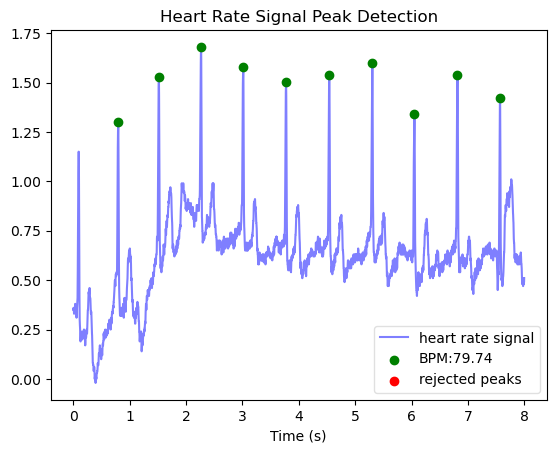

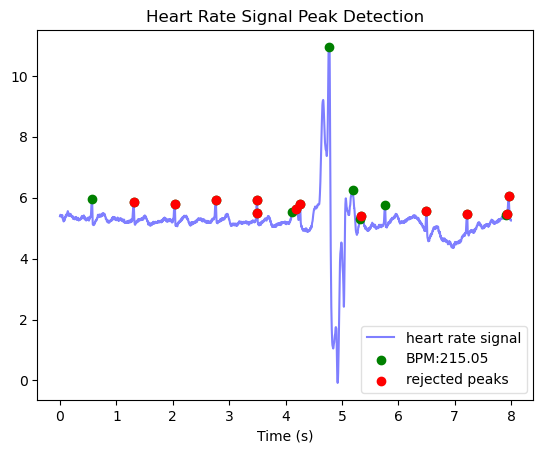

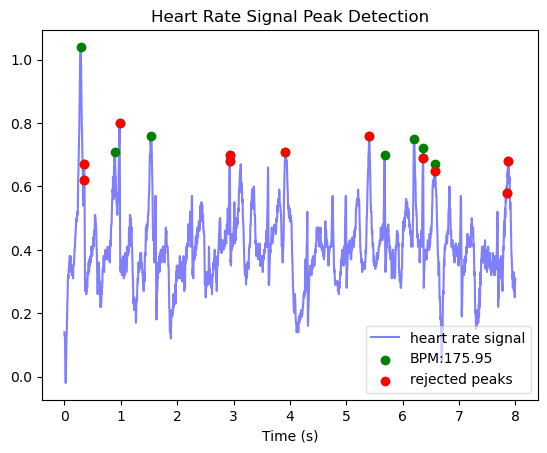

In [7]:
# First we will convert our processed ECGs into a form that HeartPy can understand. They provide a get_data function
# REMEMBER- we imported HeartPy as hp. As such, when we want to use a method from their package we do hp.~method_here~. This is a very important principle that we use for the whole notebook
standing = hp.get_data('standing.csv', column_name='standing') #  We reference the column name of the data we want. You can read the documentation for the get_data method to see other arguments you can use
jumping = hp.get_data('jumping.csv', column_name='jumping')
walking = hp.get_data('walking.csv', column_name='walking')

# Send the data to our extract_data function to convert it into some meaningful information 
standing_data, standing_measures = extract_data(standing, sample_rate, False) # initially, lets not enhance the peaks just to see what we get. We add two variables on the left of the = because we return two things from the function!
jumping_data, jumping_measures = extract_data(jumping, sample_rate, False)
walking_data, walking_measures = extract_data(walking, sample_rate, False)

# one of the reasons we want to use the built in tools from heartpy to extract the data from the csv file is because it will allow us to easily visualize the data using their plotter function
# This is one of the benefits of using libraries for common tools! Doing all of this by hand would take us a long time to build, but using someone elses code its super easy!
hp.plotter(standing_data, standing_measures)
hp.plotter(jumping_data, jumping_measures)
hp.plotter(walking_data, walking_measures)

### Remember, this is not a lesson on how to analyze ECGs in the most accurate way. This is a lesson on Python fundamentals and how to work with Python packages
### That being said, it looks like the signal is pretty messy and there are a lot of rejected peaks. If you look at the HeartPy documentatio it uses the R peaks to try and do predictions, and we can see it rejected a lot of peaks here.  
### Fortunately, HearyPy provides a built in method to enhance the peaks (which we already include in our extract_data function). Lets set that argument to 'True' and try again
#### Note: if you are doing actual cardiology research, there are better ways to do these types of analysis. Consult with an expert or make sure you really know what you are doing before basing clinical decisions/ research aims off this type of analysis!

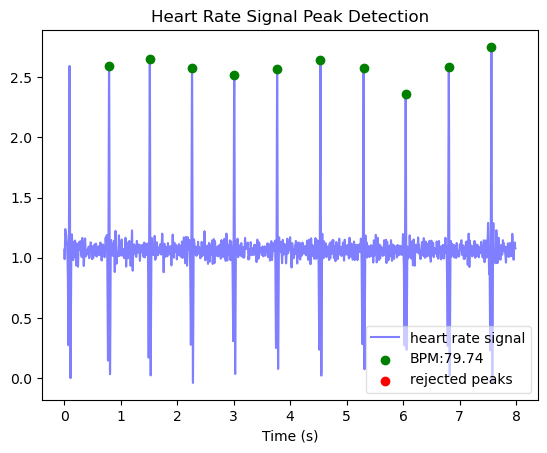

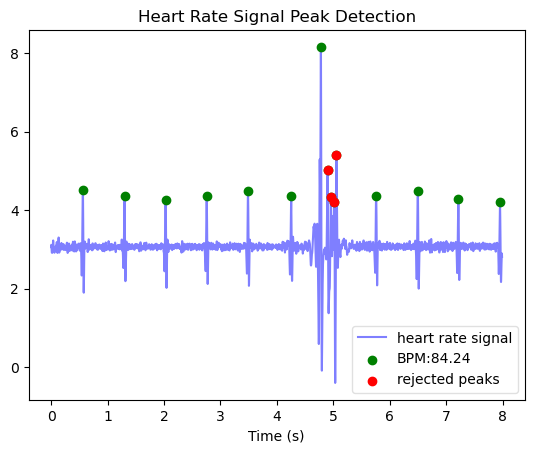

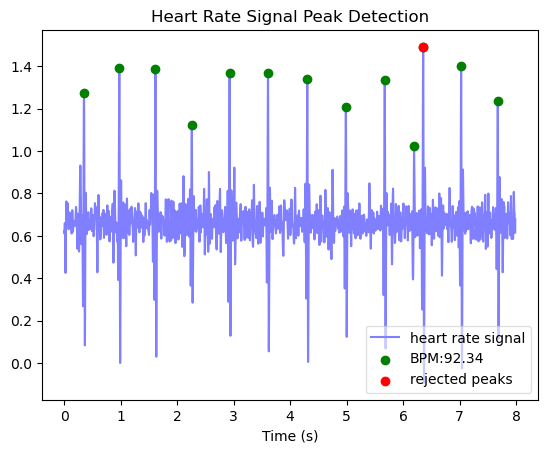

In [8]:
# All this code is the same as the cell above, except we pass True to enhance the peaks instead of false. The same data is being analyzed!
standing_data_enhance, standing_measures_enhance = extract_data(standing, sample_rate, True)
jumping_data_enhance, jumping_measures_enhance = extract_data(jumping, sample_rate, True)
walking_data_enhance, walking_measures_enhance = extract_data(walking, sample_rate, True)

hp.plotter(standing_data_enhance, standing_measures_enhance)
hp.plotter(jumping_data_enhance, jumping_measures_enhance)
hp.plotter(walking_data_enhance, walking_measures_enhance)

### It looks like like using the enhance_ecg_peaks gives us slightly cleaner data. That is awesome! Now lets dig into this a little bit more and start to really understand what we have done and how we can make use of the data we've got

In [81]:
# Earlier we imported a module called pretty print. All this does is help us spruce up the built in python print function to observe our data a little easier
# Technially, pp is an instance of the PrettyPrinter class from the module pretty print. This gets into object oriented programming, an important paradigm for writing code
# No need right now to take a deep dive, but feel free to learn on your own as there is a lot to tackle there
pp = pprint.PrettyPrinter(indent=4)

### Lets start by just analyzing the standing_measure_enhance that we got above from our extract_data function. From the documentation we know that the 'data' variable contains the working data processed within HeartPy to better understand our ECGs, and the 'measure' variable contains all the measures it calculated. Both of these are stored in dictionaries (https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/quickstart.html#quickstart). 
### Since we really want to compare some measurements betwen these ECGs, lets take a look using (pretty print) at the measure variable. Feel free to check out the 'data' one as well as it can pretty informative

In [85]:
pp.pprint(standing_measures_enhance) # this uses the instance of the Pretty Printer class we defined above to call a method of the class. 
                                     # Again, more object oriented programming stuff so no need to understand the details, but it is helpful for us to use here for visualization purposes

{   'bpm': 79.74010632014176,
    'breathingrate': 0.14766686355581807,
    'hr_mad': 8.0,
    'ibi': 752.4444444444445,
    'pnn20': 0.125,
    'pnn50': 0.0,
    'rmssd': 15.149257407543116,
    's': 400.1620141425374,
    'sd1': 10.281962361339394,
    'sd1/sd2': 0.8299769508566924,
    'sd2': 12.388250481807324,
    'sdnn': 13.458670159757084,
    'sdsd': 8.912771734987944}


### Awesome. Now we are finally taking a look under the hood at what HeartPy is doing. And (if you have reached the cardiology block in medical school), a lot of these words should be familiar! Here is a helpful guide, however:
- 'bpm': Estimated average beats per minute over the signal 
- 'breathingrate': Estimated breathing rate
- 'hr_mad': Median Absolute Deviation of heart rate
- 'ibi': Interbeat Interval, average amount of time between beats 
- 'pnn20': Proportion of differences between adjacent NN intervals greater than 20ms 
- 'pnn50': Proportion of differences between adjacent NN intervals greater than 50ms
- 'rmssd': Root Mean Square of Successive Differences between adjacent NN intervals 
- 's': Poincaré plot S measure
- 'sd1': Poincaré plot SD1 measure
- 'sd2': Poincaré plot SD2 measure
- 'sd1/sd2': Ratio of Poincaré plot SD1/SD2
- 'sdnn': Standard Deviation of NN/RR intervals 
- 'sdsd': Standard Deviation of differences between adjacent NN/RR intervals 
##### *We found this information from the documentation as well as reading some of their source code. Sometimes a combo approach is required!*
### Obviously, theres a lot to unpack here, but lets first take a moment to congratulate ourselves at all of this data we just extracted from an ecg using a few lines of code!

### Now that we have all this awesome data for the same person standing, jumping, and walking, lets just try and analyze it in a few different ways, because we can. Lets shoot for four, basic bar plots
1. Comparison of bpm for all the ecgs
2. Comparison of breathing rate for all the ecgs
3. Comparison of the median absolute deviation of the heart rate
4. Comparison of interbeat interval for all the ecgs
#### If you want to get fancier, you can definitely use this data to create Poincaré plots and dig more into the stats of everything, but this is not an ecg analysis module or a stats module (stick around til Module 3 for all of that stuff). That being said, we encourage you to dig deeper with this data and play around with it. It is good practice reading documentation/ coding and, who knows, you might have fun

In [88]:
# First lets get all the data we want and put into some lists that we can easily manage. Because the data we care about is the value in a key:value pair in the dictionary,
# we will reference the dictionary and use the key to insert the value into our list. You could use the same approach for any of the data in the dictionary

bpm = [standing_measures_enhance['bpm'], jumping_measures_enhance['bpm'], walking_measures_enhance['bpm']] # here, 'bpm' is the key. You can get this by printing the dictionary out like we did above, or read the documentation
breathingrate = [standing_measures_enhance['breathingrate'], jumping_measures_enhance['breathingrate'], walking_measures_enhance['breathingrate']] # 'breathingrate' is the key 
hr_mad = [standing_measures_enhance['hr_mad'], jumping_measures_enhance['hr_mad'], walking_measures_enhance['hr_mad']] # 'hr_mad' is the key
ibi = [standing_measures_enhance['ibi'], jumping_measures_enhance['ibi'], walking_measures_enhance['ibi']] # 'ibi' is the key

# Dont have to do this, but lets print our lists to see what we are workin with

print (bpm)
print (breathingrate)
print (hr_mad)
print (ibi)

[79.74010632014176, 84.2433697347894, 92.33610341643583]
[0.14766686355581807, 0.31201248049922, 0.1538935056940597]
[8.0, 8.0, 22.0]
[752.4444444444445, 712.2222222222222, 649.8]


###  Nice! It worked. Now all thats left to do is some plotting (we used matplotlib here but other options exist) to visualize our data!

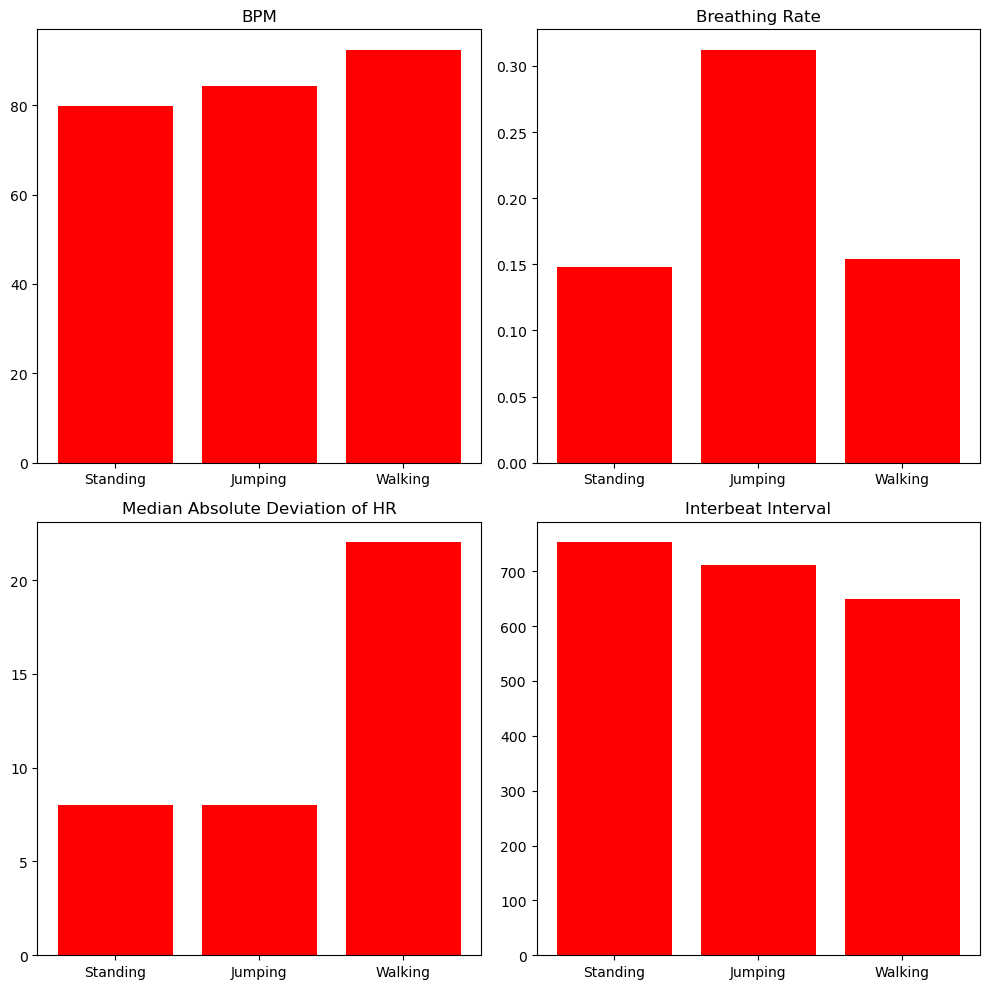

In [89]:
# make some labels for the columns- it is important you write these in the same order you define the lists earlier
labels = ['Standing', 'Jumping', 'Walking']

# Create a figure with 2x2 subplots as we want to put all the plots on one figure- this some matplotlib syntax. 
# Most people (including the author) have to look this up every time they make a graph, so no need to commit this to memory
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Add the data to the subplots to visualize!
# the [0,0], [0,1] notation indicicates at which position on the 2x2 grid the plots will go
# [0,0] --> top left, [1,1] --> bottom right, etc

axs[0, 0].bar(labels, bpm, color='red') # make it red bc heart
axs[0, 0].set_title('BPM')

axs[0, 1].bar(labels, breathingrate, color='red')
axs[0, 1].set_title('Breathing Rate')

axs[1, 0].bar(labels, hr_mad,color='red')
axs[1, 0].set_title('Median Absolute Deviation of HR')

axs[1, 1].bar(labels, ibi,color='red')
axs[1, 1].set_title('Interbeat Interval')

# Display the plots
plt.tight_layout()
plt.show()


### And tada! It is done! We have sucessfully extracted some useful information from ECGs using only computational tools. Better yet, the data makes sense! BPM goes up when walking, interbeat interval is highest when standing, and the breathing rate went up for the jump! It's always nice when data is explainable

### However, in a real world setting data is often not this nice (we did a bit of cherry picking here), and a lot of effort is required to gather insights (see module 3 and 4 for more info). Hopefully now though you have a better understanding of what it is like to work with a package in Python and use it to take a very abstract problem and break it down with minimal effort. If you have access to your own ECG data give it a try (just make sure to cite the author of HeartPy if you publish anything ;)

#### van Gent, Paul & Farah, Haneen & Nes, Nicole & Arem, B.. (2018). Heart Rate Analysis for Human Factors: Development and Validation of an Open Source Toolkit for Noisy Naturalistic Heart Rate Data. 